In [1]:
#Import dependencies
import csv
import pandas as pd
import matplotlib.pyplot as plt
import gmaps
import gmaps.datasets
import requests
import json
import seaborn as sns
from config import gkey 
from random import sample

In [2]:
#Load CSV
accident_data = pd.read_csv("Resources/2021_us_accidents.csv")
accident_data.head()

,Severity,Start_Lat,Start_Lng,State,Roundabout,Stop,Traffic_Signal,Sunrise_Sunset,Visibility(mi),Crossing
0,2,42.382359,-71.022318,MA,False,False,False,Night,10.0,False
1,2,40.908676,-123.707116,CA,False,False,False,Night,2.0,False
2,2,38.970628,-77.116333,MD,False,False,False,Day,10.0,False
3,2,47.642651,-122.318590,WA,False,False,False,Day,10.0,False
4,2,37.419536,-122.090640,CA,False,False,False,Day,10.0,False


In [3]:
#Add a column to count each accident as 1
accident_data["# of accidents"] = 1
accident_data.head()

,Severity,Start_Lat,Start_Lng,State,Roundabout,Stop,Traffic_Signal,Sunrise_Sunset,Visibility(mi),Crossing,# of accidents
0,2,42.382359,-71.022318,MA,False,False,False,Night,10.0,False,1
1,2,40.908676,-123.707116,CA,False,False,False,Night,2.0,False,1
2,2,38.970628,-77.116333,MD,False,False,False,Day,10.0,False,1
3,2,47.642651,-122.318590,WA,False,False,False,Day,10.0,False,1
4,2,37.419536,-122.090640,CA,False,False,False,Day,10.0,False,1


In [4]:
#See how many rows there are
len(accident_data["State"])

1511745

In [5]:
#Pull out columns for the heatmap
accident_data[["Start_Lat","Start_Lng","State","Severity"]][724:737]

,Start_Lat,Start_Lng,State,Severity
724,34.404527,-117.567234,CA,2
725,38.068042,-77.330525,VA,4
726,25.659734,-80.416025,FL,2
727,25.657368,-80.415920,FL,2
728,40.587741,-111.922077,UT,2
729,26.736497,-80.090694,FL,2
730,33.773968,-117.818345,CA,2
731,25.733210,-80.307124,FL,2
732,25.733395,-80.301272,FL,2
733,25.733257,-80.305571,FL,2


In [6]:
#Create a sample for the limitations of our API key
sample = accident_data.sample(n = 10 , replace = False)
print(sample)

         Severity  Start_Lat   Start_Lng State  Roundabout   Stop  \
67489           2  28.449924  -81.479136    FL       False  False   
744383          2  32.778793 -117.106071    CA       False  False   
892550          2  37.602046 -120.867745    CA       False  False   
660323          2  34.204751 -117.130660    CA       False  False   
996826          2  26.567379  -80.069489    FL       False  False   
25631           2  36.630360 -119.688346    CA       False  False   
543690          2  30.317109  -81.734049    FL       False  False   
1454110         2  28.612567  -81.459709    FL       False  False   
691419          2  37.510661  -77.192617    VA       False  False   
1215063         2  38.434307 -122.687850    CA       False  False   

         Traffic_Signal Sunrise_Sunset  Visibility(mi)  Crossing  \
67489             False            Day            10.0     False   
744383            False          Night             5.0     False   
892550            False            D

In [7]:
#Data for just Minnesota
MN_accident_data = accident_data.loc[accident_data["State"] == "MN"]


In [8]:
ustates = []
for x in accident_data["State"]:
    if x not in ustates:
        ustates.append(x)
print(ustates)
#This list includes the continential US and Washington DC. (Excludes AK and HI)

['MA', 'CA', 'MD', 'WA', 'NC', 'FL', 'MO', 'TX', 'MN', 'AZ', 'AL', 'NJ', 'VA', 'SC', 'UT', 'TN', 'CO', 'NY', 'LA', 'PA', 'OR', 'WV', 'IL', 'AR', 'MT', 'DC', 'MI', 'NM', 'CT', 'MS', 'ND', 'IN', 'ID', 'GA', 'OH', 'NV', 'OK', 'DE', 'WY', 'KY', 'NH', 'NE', 'KS', 'IA', 'SD', 'RI', 'WI', 'ME', 'VT']


Text(0, 0.5, 'Latitude')

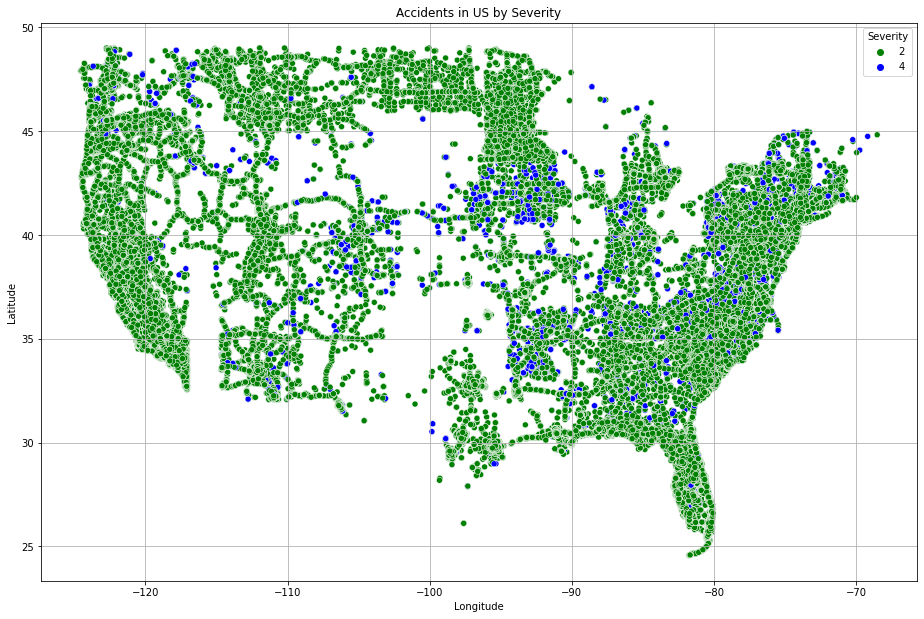

In [9]:
#Scatter plot of accidents in our data
# x_values = accident_data["Start_Lng"]
# y_values = accident_data["Start_Lat"]
# fig, ac = plt.subplots(figsize = (10,7),)
# ac.scatter(x_values,y_values, facecolors = "r", edgecolors = "b", alpha = 0.5)
# plt.xlabel("Longitude")
# plt.ylabel("Latitude")
# plt.show()

fig, ax = plt.subplots(figsize=(15.7,10.27))
_severity= ['1', '2', '3', '4']


sns.scatterplot(data=accident_data, x="Start_Lng", y="Start_Lat", hue='Severity', palette=['green','blue'])
plt.grid()
plt.title("Accidents in US by Severity")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

In [10]:
#Code for heatmap
# gmaps_key = gmaps.configure(api_key = gkey)
# locations = sample[["Start_Lat","Start_Lng"]]
# weights = sample["# of accidents"][0:10]

In [11]:
#Code to display heatmap
# fig = gmaps.figure()
# fig.add_layer(gmaps.heatmap_layer(locations, weights = weights[0:10]))
# fig

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

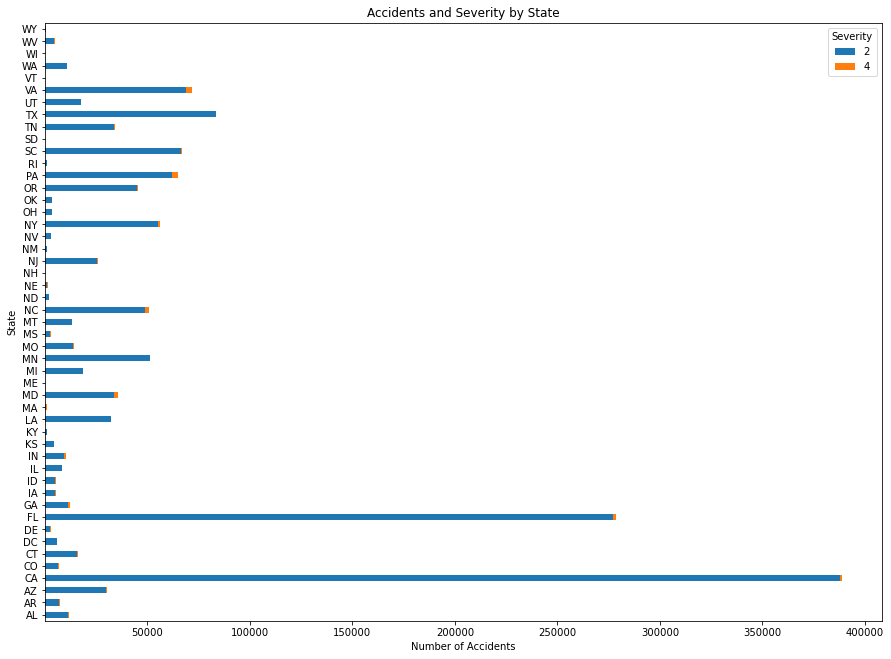

In [12]:
accbystate = accident_data[["State", "Severity","# of accidents"]]
accbystate.groupby(['State', 'Severity']).size().unstack().plot(kind='barh', stacked=True, figsize = (15, 11))
plt.title("Accidents and Severity by State")
plt.xlabel("Number of Accidents")
plt.tight_layout

In [13]:
groupby = accident_data.groupby(['Visibility(mi)'])['# of accidents']
groupby.head()

0          1
1          1
2          1
3          1
4          1
          ..
1383954    1
1426609    1
1463427    1
1470841    1
1506596    1
Name: # of accidents, Length: 172, dtype: int64

In [29]:
vis_data = accident_data.groupby("Visibility(mi)").count()
vis_data["# of accidents"]

Visibility(mi)
0.00         2145
0.06           72
0.12          474
0.19           10
0.25         7203
0.38           96
0.50         6407
0.63           51
0.75         5567
0.88           35
1.00        24056
2.00        26902
3.00        23726
4.00        24586
5.00        28391
6.00        25974
7.00        40593
8.00        29565
9.00        35850
10.00     1193773
12.00           1
13.00        1543
15.00        1214
16.00           1
20.00         503
23.00           6
25.00         139
30.00           7
40.00         212
50.00          16
60.00           7
70.00           9
75.00           5
80.00         108
90.00           4
100.00         32
140.00          1
Name: # of accidents, dtype: int64

In [39]:
vis_data.reset_index(inplace = True)
vis_data

,Visibility(mi),Severity,Start_Lat,Start_Lng,State,Roundabout,Stop,Traffic_Signal,Sunrise_Sunset,Crossing,# of accidents
0,0.00,2145,2145,2145,2145,2145,2145,2145,2142,2145,2145
1,0.06,72,72,72,72,72,72,72,72,72,72
2,0.12,474,474,474,474,474,474,474,474,474,474
3,0.19,10,10,10,10,10,10,10,10,10,10
4,0.25,7203,7203,7203,7203,7203,7203,7203,7194,7203,7203
5,0.38,96,96,96,96,96,96,96,96,96,96
6,0.50,6407,6407,6407,6407,6407,6407,6407,6400,6407,6407
7,0.63,51,51,51,51,51,51,51,51,51,51
8,0.75,5567,5567,5567,5567,5567,5567,5567,5545,5567,5567
9,0.88,35,35,35,35,35,35,35,35,35,35


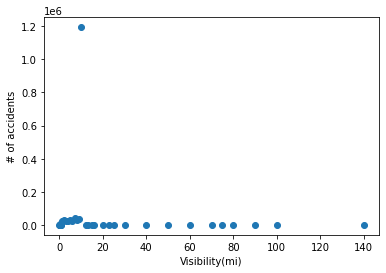

In [40]:
#Scatter plot of visibility vs accidents
groupby = accident_data.groupby(['Visibility(mi)'])['# of accidents'].sum()
x_values = vis_data["Visibility(mi)"]
y_values = vis_data["# of accidents"]
plt.scatter(x_values,y_values)
plt.xlabel("Visibility(mi)")
plt.ylabel("# of accidents")
plt.show()

<AxesSubplot:ylabel='# of accidents'>

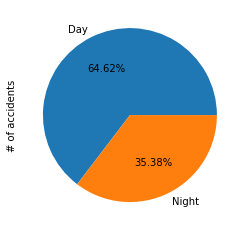

In [16]:
daynight = accident_data[["Sunrise_Sunset","# of accidents"]].groupby("Sunrise_Sunset").count()
daynight.plot.pie(y = "# of accidents", legend = False, autopct = "%1.2f%%")

In [17]:
roundabouts = (accident_data.loc[accident_data["Roundabout"] == True]).sum()
stop = (accident_data.loc[accident_data["Stop"] == True]).sum()
signal = (accident_data.loc[accident_data["Traffic_Signal"] == True]).sum()
crosswalk = (accident_data.loc[accident_data["Crossing"] == True]).sum()
none = accident_data.loc[(accident_data["Roundabout"] == False) & (accident_data["Stop"] == False) & (accident_data["Traffic_Signal"] == False) & (accident_data["Crossing"] == False)].sum()

/var/folders/f4/dq5n9kfj4t97hl4f3bv12x2r0000gn/T/ipykernel_10315/57356947.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  roundabouts = (accident_data.loc[accident_data["Roundabout"] == True]).sum()
/var/folders/f4/dq5n9kfj4t97hl4f3bv12x2r0000gn/T/ipykernel_10315/57356947.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  stop = (accident_data.loc[accident_data["Stop"] == True]).sum()
/var/folders/f4/dq5n9kfj4t97hl4f3bv12x2r0000gn/T/ipykernel_10315/57356947.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns bef

In [18]:
none["# of accidents"]

1306800

In [19]:
crosswalk["Crossing"]

112782

([<matplotlib.patches.Wedge at 0x7fab0aada9d0>,
 [Text(1.0999999832807166, 0.00019178744374520777, 'Roundabouts'),
  Text(1.097825448963028, 0.06913236296501168, 'Stop Sign'),
  Text(1.0297203463411746, 0.38687983706961493, 'Traffic Signal'),
  Text(0.7509391456523548, 0.8037974866388372, 'Crosswalk'),
  Text(-1.2130627862791739, -0.6989124956277484, 'No Obstruction')],
 [Text(0.5999999908803908, 0.0001046113329519315, '0.0%'),
  Text(0.5988138812525606, 0.0377085616172791, '2.0%'),
  Text(0.5616656434588224, 0.21102536567433539, '7.4%'),
  Text(0.4096031703558298, 0.43843499271209296, '7.2%'),
  Text(-0.7798260768937546, -0.4493008900464096, '83.4%')])

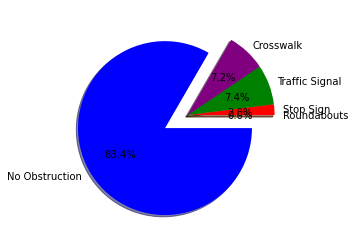

In [20]:
distruptions = [roundabouts["Roundabout"], stop["Stop"], signal["Traffic_Signal"], crosswalk["Crossing"], none["# of accidents"]]
distruption_labels = ["Roundabouts", "Stop Sign", "Traffic Signal", "Crosswalk", "No Obstruction"]
colors = ["yellow", "red", "green", "purple", "blue"]
explode = (0,0,0,0,0.3)
plt.pie(distruptions, explode=explode, labels=distruption_labels, colors=colors, autopct="%1.1f%%", shadow=True)